In [53]:
import matplotlib.pyplot as plt
import pickle
from skimage.transform import rotate
from scipy import ndimage
from skimage.util import img_as_ubyte
from joblib import Parallel, delayed
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _generate_sample_indices
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import product
import seaborn as sns

#import sys
#sys.path.append("../lifelong_learner")
#from lf import LF

%matplotlib inline

In [28]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [76]:
task = range(0,10,1)
ntrees = range(100,5000,100)

ntask = len(task)
n_ntrees = len(ntrees)

err = np.zeros((ntask,n_ntrees),dtype=float)

for t in task:
    for count,tree in enumerate(ntrees):
        filename = '/data/Jayanta/continual-learning/control_res/task'+str(t)+'_'+str(tree)
        err[t-1,count] = 1 - unpickle(filename)
        


In [77]:
err

array([[0.35633333, 0.3785    , 0.3905    , 0.39833333, 0.40383333,
        0.40133333, 0.40833333, 0.40816667, 0.40733333, 0.41016667,
        0.411     , 0.4125    , 0.41266667, 0.4145    , 0.417     ,
        0.4165    , 0.41433333, 0.41616667, 0.41633333, 0.41666667,
        0.41883333, 0.4175    , 0.41916667, 0.41883333, 0.4195    ,
        0.42033333, 0.42033333, 0.42133333, 0.42066667, 0.422     ,
        0.423     , 0.42316667, 0.42216667, 0.42166667, 0.422     ,
        0.4225    , 0.42116667, 0.42183333, 0.42266667, 0.42083333,
        0.42      , 0.422     , 0.421     , 0.42183333, 0.4215    ,
        0.422     , 0.42216667, 0.42133333, 0.42066667],
       [0.44716667, 0.47083333, 0.4825    , 0.4865    , 0.49166667,
        0.49316667, 0.49183333, 0.49716667, 0.49566667, 0.49683333,
        0.49533333, 0.49966667, 0.49983333, 0.49883333, 0.50083333,
        0.50283333, 0.50383333, 0.50333333, 0.50383333, 0.50316667,
        0.5055    , 0.504     , 0.50483333, 0.50316667, 0.5

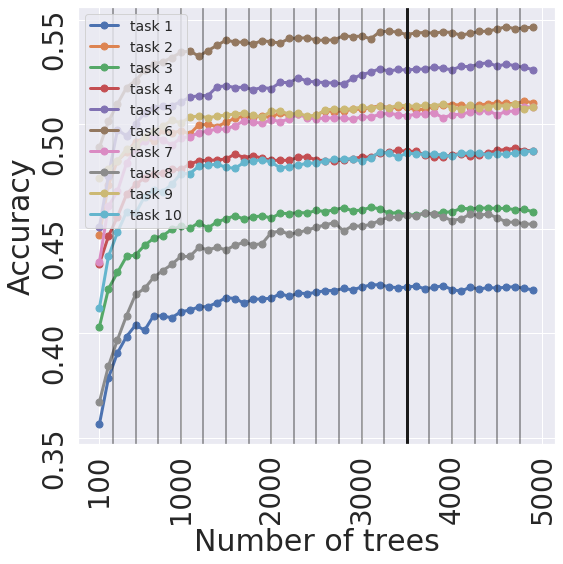

In [82]:
sns.set()

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(10):
    ax.plot(ntrees, err[i,:], marker='.', label = 'task '+str(i+1), markersize=14, linewidth=3)

ax.set_xticks([100,1000,2000,3000,4000,5000])
#ax.set_yticks([0.9, 1.0, 1.1, 1.2])
#ax.set_ylim(0.89, 1.21)
ax.tick_params(labelsize=27.5,rotation=90)
ax.legend(loc='upper left', fontsize=14)
# ax[0].legend(algos, bbox_to_anchor=(1.2, -.2), loc=2, borderaxespad=0)

ax.set_ylabel('Accuracy', fontsize=30)
ax.set_xlabel('Number of trees', fontsize=30)

#ax.grid(axis='x')

for i in range(250,5000,250):
    ax.axvline(x = i, linewidth=1.5,alpha=0.5, color='k')

ax.axvline(x = 3500, linewidth=3, color='k')

#ax.hlines(0.422, 1,5000, colors='k', linestyles='dashed',linewidth=2)

plt.tight_layout()


plt.savefig('/data/Jayanta/task1.png',dpi=500)